# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [10]:
!pip install citipy

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [12]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

In [13]:

city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [14]:
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")
        
        print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : toccoa
Processing Record 2 of Set 1 : kapaa
Processing Record 3 of Set 1 : chuy
Processing Record 4 of Set 1 : punta arenas
Processing Record 5 of Set 1 : barrhead
Processing Record 6 of Set 1 : bambous virieux
Processing Record 7 of Set 1 : yellowknife
Processing Record 8 of Set 1 : hilo
Processing Record 9 of Set 1 : cape town
Processing Record 10 of Set 1 : alma
Processing Record 11 of Set 1 : vaini
Processing Record 12 of Set 1 : ushuaia
Processing Record 13 of Set 1 : verkhoyansk
Processing Record 14 of Set 1 : carthage
City not found. Skipping...
-----------------------------
Processing Record 15 of Set 1 : praia da vitoria
Processing Record 16 of Set 1 : pevek
Processing Record 17 of Set 1 : puerto ayora
Processing Record 18 of Set 1 : victoria
Processing Record 19 of Set 1 : port alfred
Processing Record 20 of Set 1 : busselton
Processing Record 21 of Set 1 : avarua
Processing Record 22 of Se

Processing Record 23 of Set 4 : provideniya
Processing Record 24 of Set 4 : oranjemund
Processing Record 25 of Set 4 : sakakah
Processing Record 26 of Set 4 : pemberton
Processing Record 27 of Set 4 : anantnag
Processing Record 28 of Set 4 : qaanaaq
Processing Record 29 of Set 4 : northam
Processing Record 30 of Set 4 : udachnyy
Processing Record 31 of Set 4 : haines junction
Processing Record 32 of Set 4 : tokur
Processing Record 33 of Set 4 : ancud
Processing Record 34 of Set 4 : sembakung
Processing Record 35 of Set 4 : bengkulu
Processing Record 36 of Set 4 : picton
Processing Record 37 of Set 4 : kristiinankaupunki
Processing Record 38 of Set 4 : omboue
Processing Record 39 of Set 4 : charlestown
Processing Record 40 of Set 4 : karasjok
Processing Record 41 of Set 4 : jiexiu
City not found. Skipping...
-----------------------------
Processing Record 42 of Set 4 : meadow lake
Processing Record 43 of Set 4 : myitkyina
Processing Record 44 of Set 4 : ryomgard
City not found. Skipping

Processing Record 9 of Set 8 : kawalu
Processing Record 10 of Set 8 : abu samrah
Processing Record 11 of Set 8 : point fortin
Processing Record 12 of Set 8 : betsiamites
Processing Record 13 of Set 8 : ostrovnoy
Processing Record 14 of Set 8 : berlevag
Processing Record 15 of Set 8 : buraydah
Processing Record 16 of Set 8 : santa fe
Processing Record 17 of Set 8 : olafsvik
Processing Record 18 of Set 8 : chesterton
City not found. Skipping...
-----------------------------
Processing Record 19 of Set 8 : catalina
Processing Record 20 of Set 8 : georgetown
Processing Record 21 of Set 8 : sfantu gheorghe
Processing Record 22 of Set 8 : salinas
Processing Record 23 of Set 8 : pervoavgustovskiy
Processing Record 24 of Set 8 : eyl
Processing Record 25 of Set 8 : surt
Processing Record 26 of Set 8 : nioro
Processing Record 27 of Set 8 : bereda
Processing Record 28 of Set 8 : toma
Processing Record 29 of Set 8 : carballo
Processing Record 30 of Set 8 : marrakesh
Processing Record 31 of Set 8 :

Processing Record 37 of Set 11 : adana
Processing Record 38 of Set 11 : skelleftea
Processing Record 39 of Set 11 : qena
Processing Record 40 of Set 11 : bousso
City not found. Skipping...
-----------------------------
Processing Record 41 of Set 11 : te anau
Processing Record 42 of Set 11 : whitehorse
Processing Record 43 of Set 11 : kieta
Processing Record 44 of Set 11 : lerwick
Processing Record 45 of Set 11 : christchurch
Processing Record 46 of Set 11 : kunashak
Processing Record 47 of Set 11 : maldonado
Processing Record 48 of Set 11 : khangarh
Processing Record 49 of Set 11 : selma
Processing Record 50 of Set 11 : blythe
City not found. Skipping...
-----------------------------
Processing Record 0 of Set 12 : guerrero negro
Processing Record 1 of Set 12 : maningrida
Processing Record 2 of Set 12 : artyom
Processing Record 3 of Set 12 : bichena
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
weather_dictionary = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})


weather_dictionary.count()

City          564
Cloudiness    564
Country       564
Date          564
Humidity      564
Lat           564
Lng           564
Max Temp      564
Wind Speed    564
dtype: int64

In [17]:
weather_dictionary

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Toccoa,90,US,1590103827,56,34.58,-83.33,73.40,4.70
1,Kapaa,90,US,1590103827,83,22.08,-159.32,77.00,21.92
2,Chui,100,UY,1590103827,95,-33.70,-53.46,62.28,11.61
3,Punta Arenas,75,CL,1590103612,75,-53.15,-70.92,44.60,12.75
4,Barrhead,100,GB,1590103827,71,55.80,-4.39,57.00,8.05
5,Bambous Virieux,75,MU,1590103827,73,-20.34,57.76,75.20,18.34
6,Yellowknife,90,CA,1590103719,46,62.46,-114.35,50.00,11.41
7,Hilo,20,US,1590103827,58,19.73,-155.09,84.20,8.05
8,Cape Town,20,ZA,1590103535,93,-33.93,18.42,57.99,2.24
9,Alma,75,CA,1590103711,33,48.55,-71.65,79.00,18.34


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [25]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
weather_dictionary.to_csv("cities.csv", index = False)


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

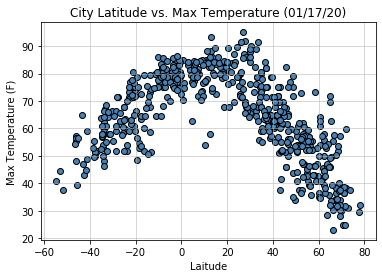

In [55]:
plt.scatter(weather_dictionary["Lat"], weather_dictionary["Max Temp"], facecolor = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Max Temperature (01/17/20)")
plt.xlabel("Laitude")
plt.ylabel("Max Temperature (F)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

plt.savefig("City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

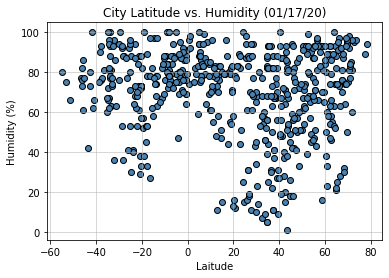

In [54]:
plt.scatter(weather_dictionary["Lat"], weather_dictionary["Humidity"], facecolor = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Humidity (01/17/20)")
plt.xlabel("Laitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

plt.savefig("City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

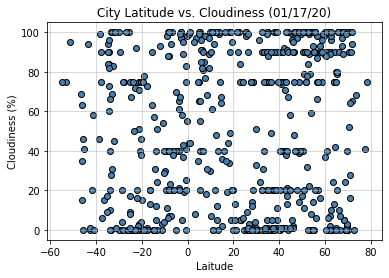

In [53]:
plt.scatter(weather_dictionary["Lat"], weather_dictionary["Cloudiness"], facecolor = "steelblue", edgecolor = "black")


plt.title("City Latitude vs. Cloudiness (01/17/20)")
plt.xlabel("Laitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-5,105)
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

plt.savefig("City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

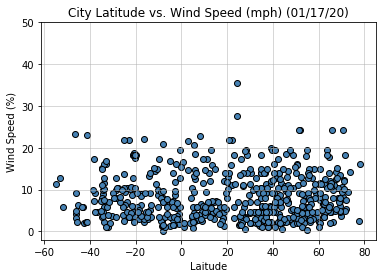

In [21]:
plt.scatter(weather_dictionary["Lat"], weather_dictionary["Wind Speed"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph) (01/17/20)")

plt.xlabel("Laitude")
plt.ylabel("Wind Speed (%)")
plt.ylim(-2,50)
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

plt.savefig("City Latitude vs Wind Speed (mph).png")

## Linear Regression

In [43]:
# Create Northern and Southern Hemisphere DataFrames

Northern_hemisphere_DataFrames = weather_dictionary.loc[weather_dictionary["Lat"] >= 0]
Southern_hemisphere_DataFrames = weather_dictionary.loc[weather_dictionary["Lat"] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [44]:
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq


def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")
    

The r-squared is : -0.82


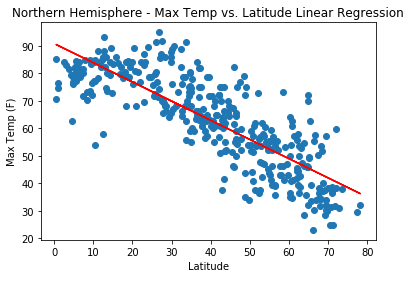

In [45]:

equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])


annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")


plt.savefig("Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.8


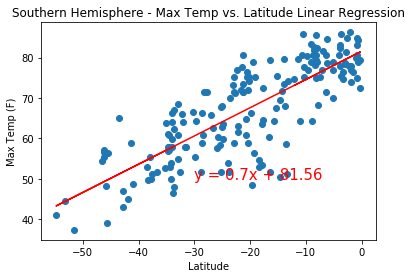

In [46]:

equation = linear_agression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])


annotate(equation, -30, 50)

plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")


plt.savefig("Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.02


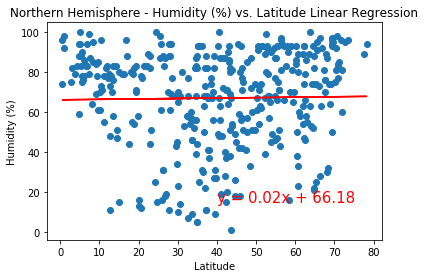

In [47]:
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

annotate(equation, 40, 15)

plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.08


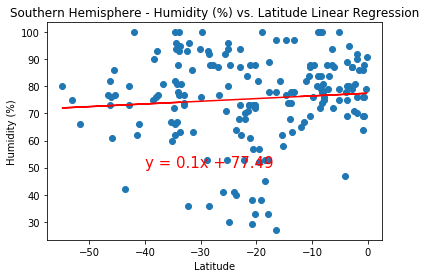

In [48]:

equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

annotate(equation, -40, 50)

plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.03


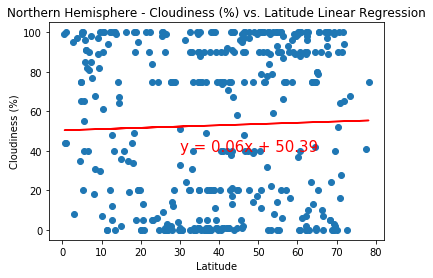

In [49]:

equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

annotate(equation, 30, 40)


plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")


plt.savefig("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : -0.05


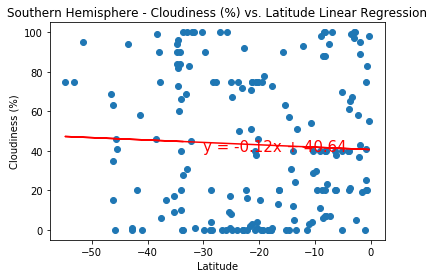

In [50]:
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])


annotate(equation, -30, 40)


plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.03


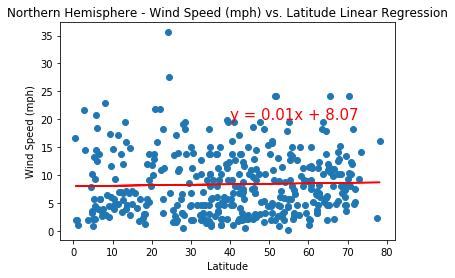

In [51]:

equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

annotate(equation, 40, 20)


plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")


plt.savefig("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.1


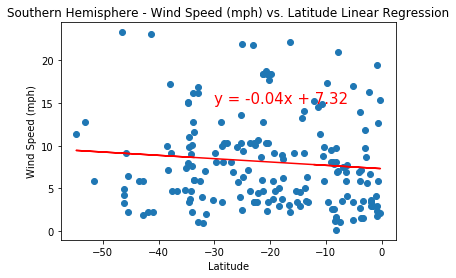

In [52]:

equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

annotate(equation, -30, 15)

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")